# Project 10-1: Use linear regression with the diamond data

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Tasks

In [2]:
# 1
data = sns.load_dataset('diamonds')

In [3]:
# 2
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<Axes: >

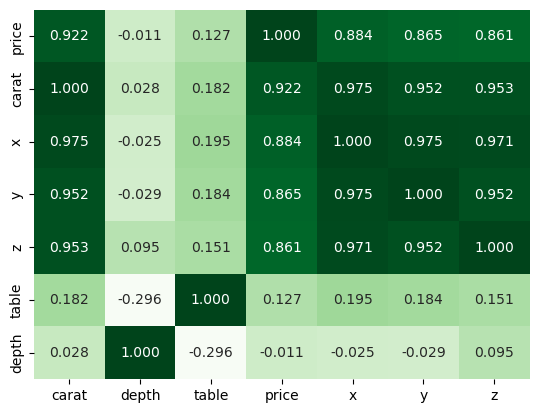

In [8]:
# 3
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sns.heatmap(data=data.select_dtypes(include=numerics).corr().sort_values(by='price', ascending=False),
            annot=True, cmap='Greens', cbar=False, fmt='.3f')

In [9]:
# 4
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']], data[['price']],
    test_size=0.30, random_state=20)

In [10]:
# 5
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [11]:
# 6
model.score(x_test, y_test)

0.8504107786474794

In [12]:
# 7
y_predicted = model.predict(x_test)

In [13]:
# 8
predicted = pd.DataFrame(y_predicted, columns=['predicted_price'])

In [14]:
# 9
combined = x_test.reset_index(drop=True).join([y_test.reset_index(drop=True), predicted])
combined.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [15]:
# 10
melted = pd.melt(combined, id_vars=['carat'], value_vars=['price','predicted_price'], 
                    var_name='price_type', value_name='price_value')

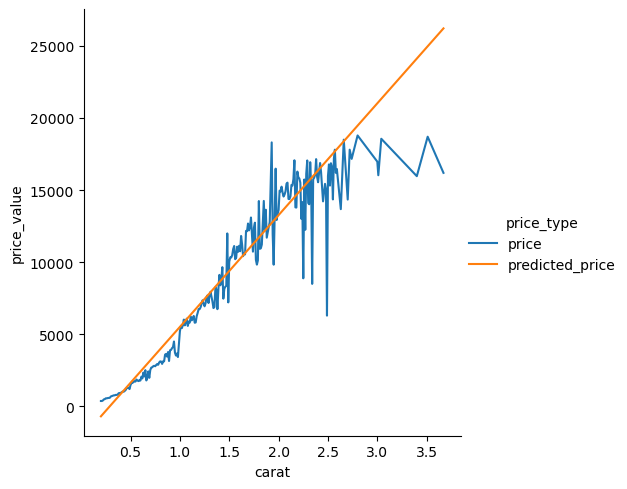

In [17]:
# 11
sns.relplot(data=melted, kind='line', x='carat', y='price_value', hue='price_type', errorbar=None)